In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("/content/Customer_Data.csv")

display(df.head())
display(df.corr(numeric_only=True))

,Customer ID,Age,Gender,Annual Income,Spending Score
0,1,62,Male,56564,86
1,2,65,Male,25393,73
2,3,18,Male,143520,39
3,4,21,Male,64711,43
4,5,21,Male,147014,98


,Customer ID,Age,Annual Income,Spending Score
Customer ID,1.000000,0.008962,-0.012420,-0.016375
Age,0.008962,1.000000,0.040519,-0.015385
Annual Income,-0.012420,0.040519,1.000000,0.039812
Spending Score,-0.016375,-0.015385,0.039812,1.000000


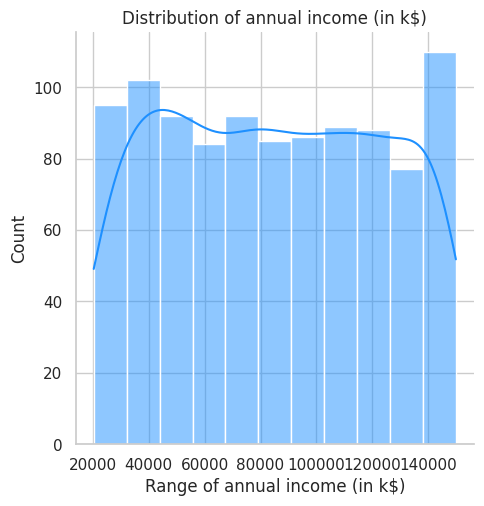

In [4]:
# distribution of annual income
sns.set(style="whitegrid")
sns.displot(df["Annual Income"], kde=True, color="dodgerblue")

plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")

plt.show()

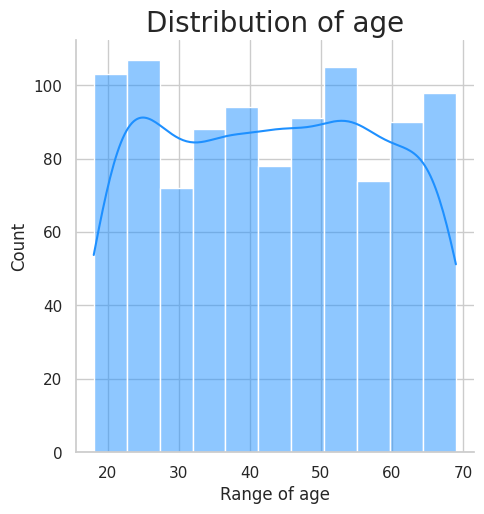

In [5]:
# distribution of age
sns.set(style="whitegrid")
sns.displot(df["Age"], kde=True, color="dodgerblue")

plt.title('Distribution of age', fontsize = 20)
plt.xlabel('Range of age')
plt.ylabel('Count')

plt.show()

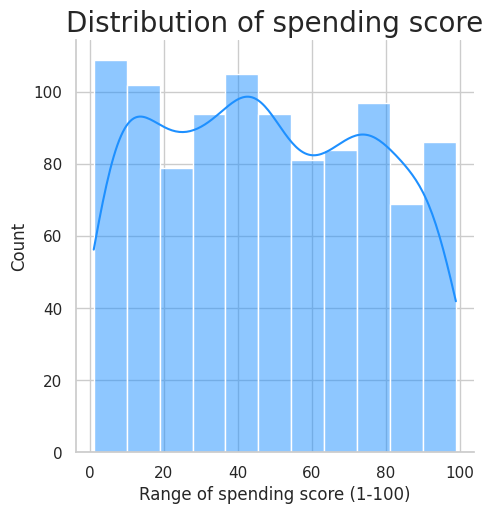

In [6]:
# distribution of spending score
sns.set(style="whitegrid")
sns.displot(df["Spending Score"], kde=True, color="dodgerblue")

plt.title('Distribution of spending score', fontsize = 20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')

plt.show()

<ipython-input-7-c509fb582110>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders.index, y=genders.values, palette=colors)


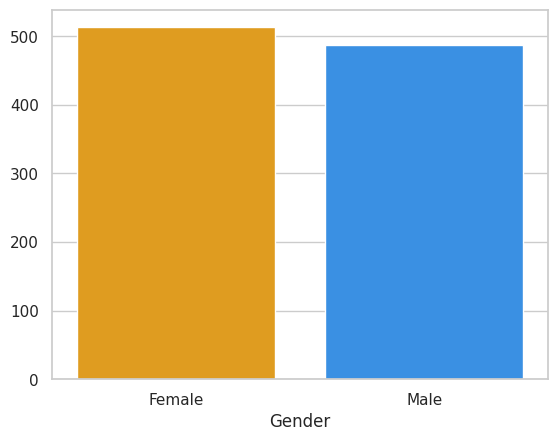

In [7]:
# gender analysis
genders = df["Gender"].value_counts()

colors = {
    "Male": "dodgerblue",
    "Female": "orange"
}

sns.set(style="whitegrid")
sns.barplot(x=genders.index, y=genders.values, palette=colors)

plt.show()

In [12]:
# considering two features: annual income and spending score
X = df[["Annual Income", "Spending Score"]]
X.head()

,Annual Income,Spending Score
0,56564,86
1,25393,73
2,143520,39
3,64711,43
4,147014,98


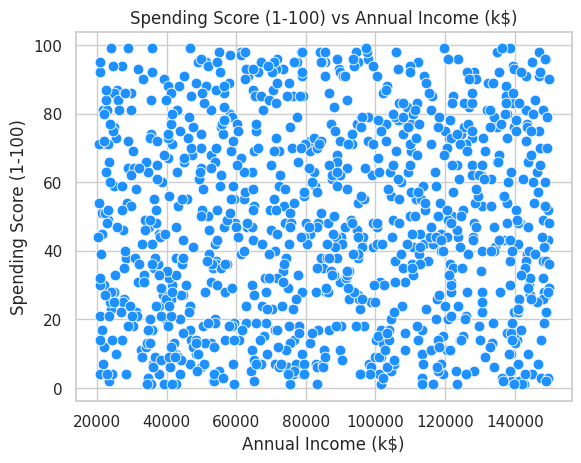

In [14]:
# scatterplot of the above data
sns.scatterplot(x="Annual Income", y="Spending Score", data=X, s=60, color="dodgerblue")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

plt.show()

![Elbow Method](media/elbow-method.png)

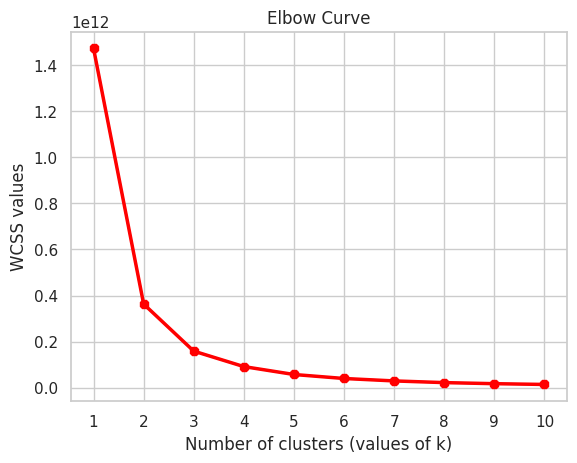

In [15]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)

# the elbow curve
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))

plt.show()

In [16]:
# taking k = 5
k_means_1 = KMeans(n_clusters=5, n_init="auto")

# fitting the input data
k_means_1.fit(X)

# predicting the labels of the input data
y_pred = k_means_1.predict(X)

# adding the labels to a column named label
df["label"] = y_pred

df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score,label
0,1,62,Male,56564,86,3
1,2,65,Male,25393,73,1
2,3,18,Male,143520,39,2
3,4,21,Male,64711,43,3
4,5,21,Male,147014,98,2


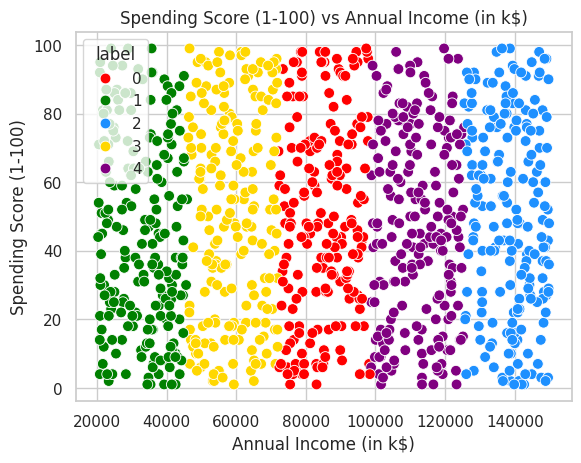

In [18]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]

# scatterplot of the clusters
sns.scatterplot(
    x="Annual Income",
    y="Spending Score",
    hue="label",
    palette=colors,
    legend="full",
    data=df,
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()